# Step 1: Install Required Packages
## Ensure all necessary packages are installed. If you haven't installed them yet, run the following cell:

In [1]:
!pip install qiskit qiskit-aer pillow matplotlib

# Step 2: Import Required Libraries
## Ensure all necessary libraries are imported correctly:

In [2]:
# Import necessary libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 3: Load and Preprocess the Image
## Define a function to load and preprocess the image:

In [3]:
def load_image(image_path, size=(4, 4)):
    image = Image.open(image_path).convert('L')
    image = image.resize(size)
    image = np.asarray(image)
    image = (image > 128).astype(int)  # Convert to binary image
    return image

# Step 4: Encode the Image into a Quantum Circuit
## Define a function to encode the image into a quantum circuit:

In [5]:
def encode_image_to_quantum(image):
    num_qubits = image.size
    qc = QuantumCircuit(num_qubits)
    
    for idx, pixel in enumerate(image.flatten()):
        if pixel == 1:
            qc.x(idx)
    return qc

# Step 5: Apply the Dilation Operator
## Define a function to apply the dilation operator to the quantum circuit:

In [6]:
def apply_dilation_operator(qc, image_size):
    num_qubits = image_size[0] * image_size[1]
    
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            idx = i * image_size[1] + j
            neighbors = []
            if i > 0:  # up
                neighbors.append(idx - image_size[1])
            if i < image_size[0] - 1:  # down
                neighbors.append(idx + image_size[1])
            if j > 0:  # left
                neighbors.append(idx - 1)
            if j < image_size[1] - 1:  # right
                neighbors.append(idx + 1)
            
            for n in neighbors:
                qc.cx(idx, n)
    return qc

# Step 6: Decode the Quantum Result to an Image
## Define a function to decode the quantum result into an image:

In [7]:
def decode_quantum_to_image(counts, image_size):
    max_state = max(counts, key=counts.get)
    binary_string = format(int(max_state, 16), f'0{image_size[0] * image_size[1]}b')
    image = np.array(list(map(int, binary_string))).reshape(image_size)
    return image

# Step 7: Perform Morphological Dilation
## Define the main function that performs morphological dilation:

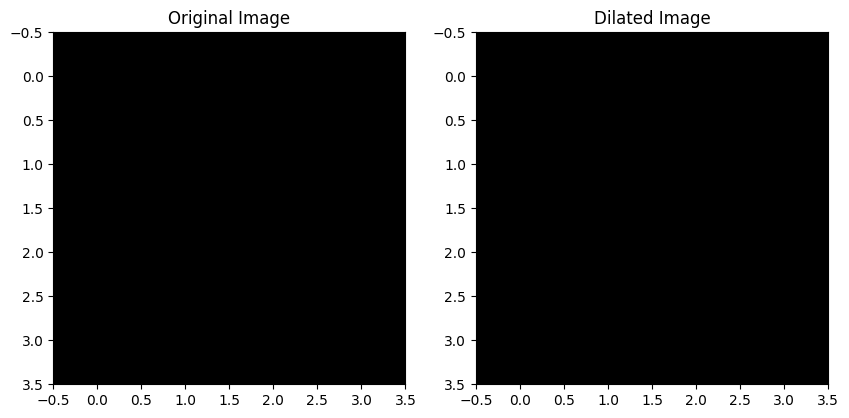

In [12]:
def morphological_dilation(image_path):
    image = load_image(image_path)
    image_size = image.shape
    
    # Encode the image into a quantum circuit
    qc = encode_image_to_quantum(image)
    
    # Apply dilation operator
    qc = apply_dilation_operator(qc, image_size)
    
    # Measure the quantum circuit
    cr = ClassicalRegister(image.size)
    qc.add_register(cr)
    qc.measure(range(image.size), range(image.size))
    
    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, backend)
    job = backend.run(t_qc)
    result = job.result()
    counts = result.get_counts()
    
    # Decode the result to an image
    dilated_image = decode_quantum_to_image(counts, image_size)
    
    # Display the original and dilated images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(dilated_image, cmap='gray')
    axs[1].set_title('Dilated Image')
    plt.show()

# Example usage
image_path = r'C:/Users/Snaptokon/OneDrive/Documents/TINT/Research/Codes/single_dot_image.png'  # Update this path to your image file
morphological_dilation(image_path)